In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
with open(r'C:\Users\Dell\Desktop\CodSoft\Task 4\spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")


data = pd.read_csv(r'C:\Users\Dell\Desktop\CodSoft\Task 4\spam.csv', encoding=encoding)

Detected encoding: Windows-1252


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns = {'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [9]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
data.duplicated().sum()

403

In [12]:
data.drop_duplicates(keep = 'first' , inplace = True)

In [13]:
data.duplicated().sum()

0

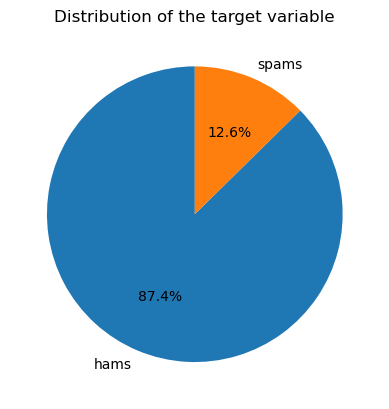

In [14]:
plt.pie(data['target'].value_counts(), labels=['hams','spams'] , autopct='%1.1f%%', startangle=90 )
plt.title('Distribution of the target variable')
plt.show()

In [15]:
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\anaconda3\lib\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
data['num_chars'] = data['text'].apply(len)
data.head

<bound method NDFrame.head of      target                                               text  num_chars
0       ham  Go until jurong point, crazy.. Available only ...        111
1       ham                      Ok lar... Joking wif u oni...         29
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...        155
3       ham  U dun say so early hor... U c already then say...         49
4       ham  Nah I don't think he goes to usf, he lives aro...         61
...     ...                                                ...        ...
5567   spam  This is the 2nd time we have tried 2 contact u...        161
5568    ham              Will Ì_ b going to esplanade fr home?         37
5569    ham  Pity, * was in mood for that. So...any other s...         57
5570    ham  The guy did some bitching but I acted like i'd...        125
5571    ham                         Rofl. Its true to its name         26

[5169 rows x 3 columns]>

In [17]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()


,target,text,num_chars,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_chars,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
data.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
data[data['target'] == 0 ][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
data[data['target'] == 1 ][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


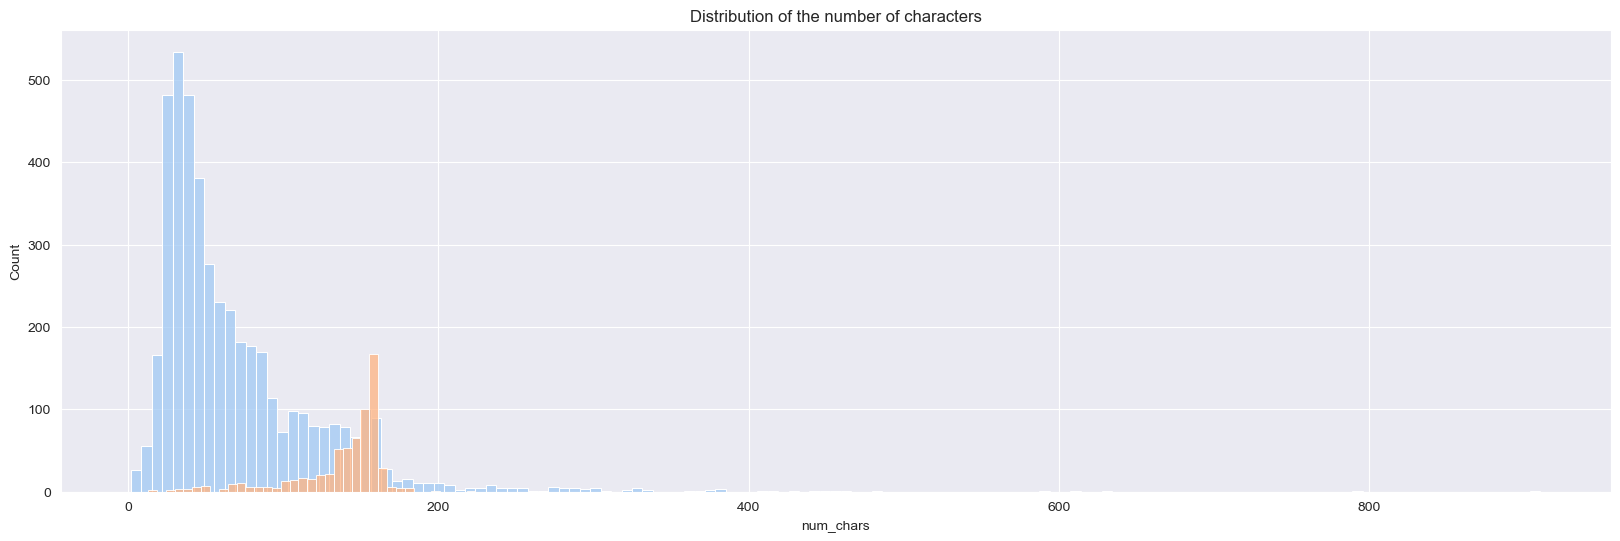

In [23]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'])
plt.title('Distribution of the number of characters')
plt.show()

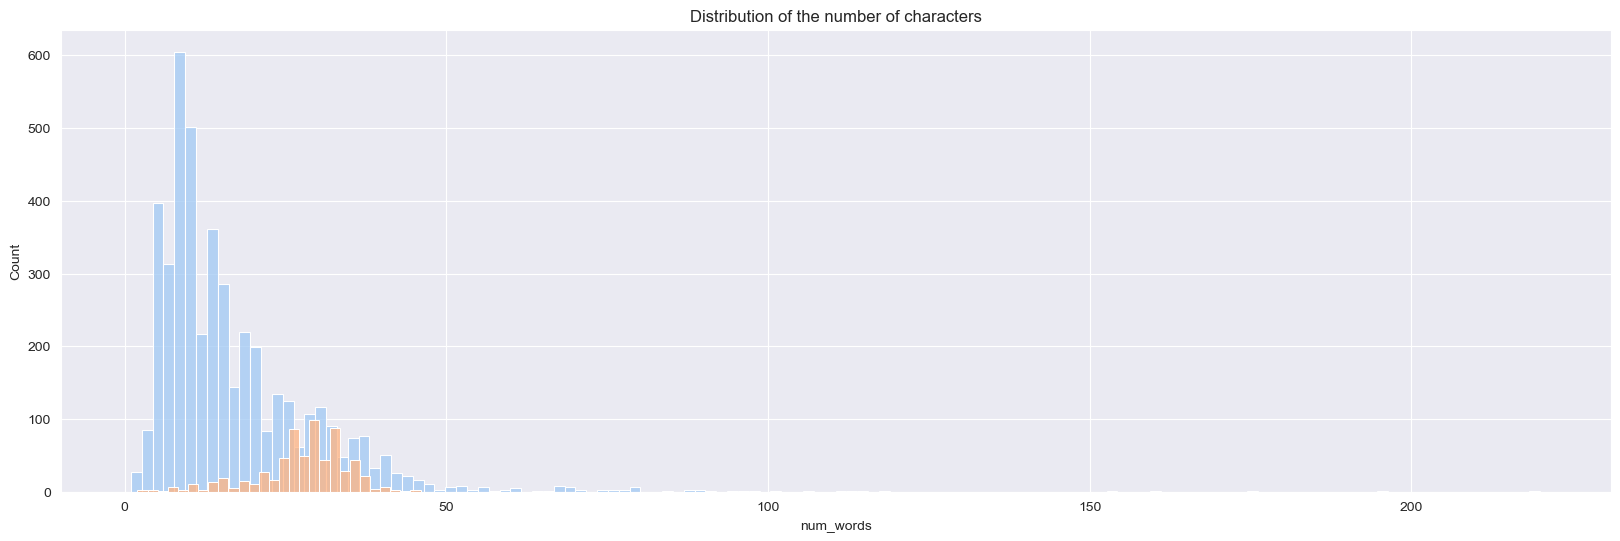

In [24]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'])
plt.title('Distribution of the number of characters')
plt.show()

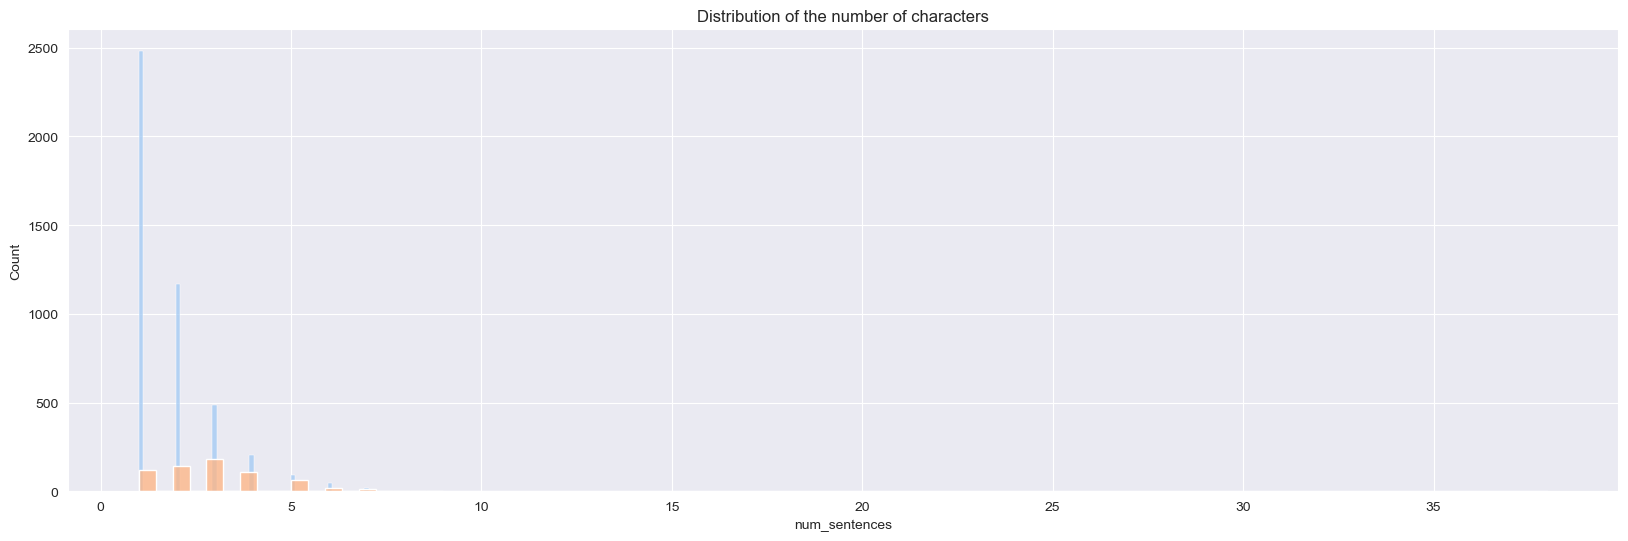

In [25]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(data[data['target'] == 0]['num_sentences'])
sns.histplot(data[data['target'] == 1]['num_sentences'])
plt.title('Distribution of the number of characters')
plt.show()

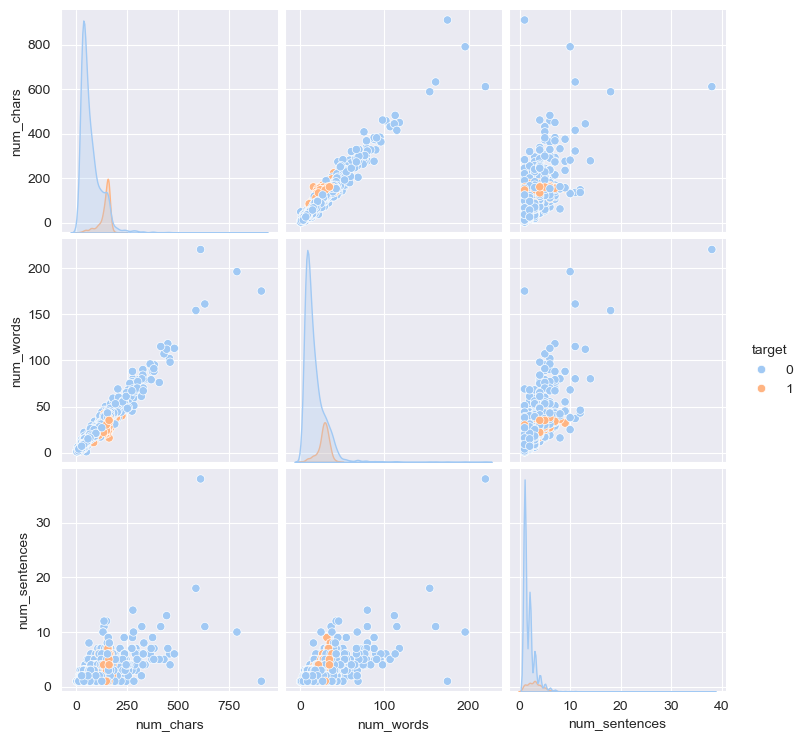

In [26]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.pairplot(data, hue = 'target')
plt.show()

In [27]:
numeric_data = data.select_dtypes(include = [np.number])
numeric_data.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

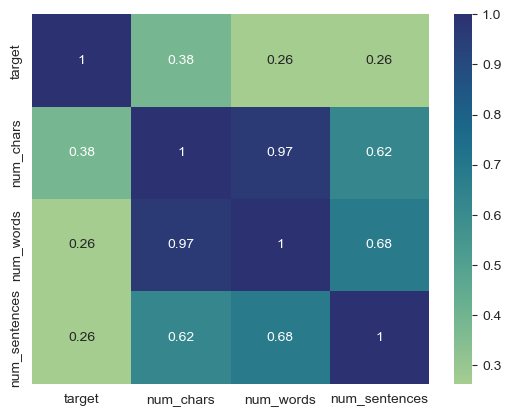

In [28]:
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'crest')

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [31]:
transform_text('I am gaming in the gaming laptop')

'game game laptop'

In [32]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
!pip install wordcloud


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width = 700 , height = 500 , max_words = 100 ,
               background_color = 'black').generate(' '.join(data['transformed_text']))

Text(0.5, 1.0, 'Most common words in ham messages')

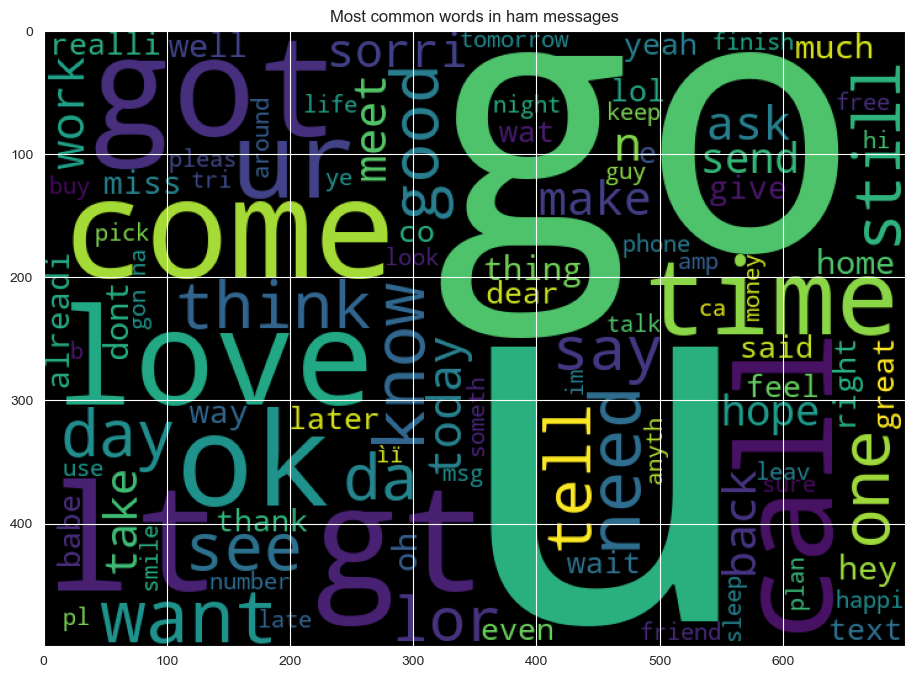

In [35]:
ham_wc = wc.generate(' '.join(data[data['target'] == 0]['transformed_text']))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)
plt.title('Most common words in ham messages')

Text(0.5, 1.0, 'Most common words in spam messages')

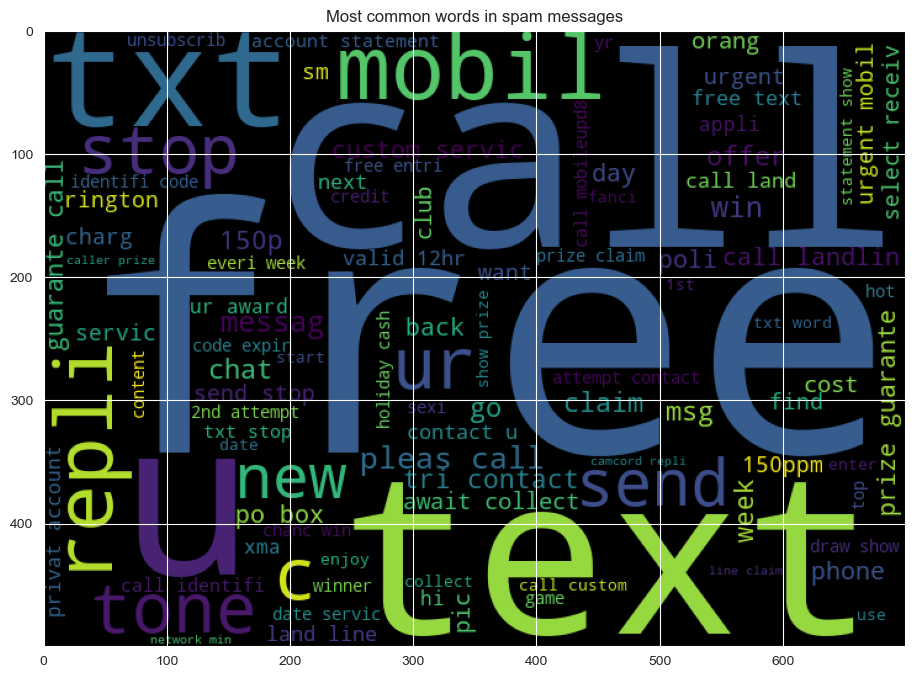

In [36]:
spam_wc = wc.generate(' '.join(data[data['target'] == 1]['transformed_text']))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)
plt.title('Most common words in spam messages')

In [37]:
spam_corpus = []
for message in data[data['target'] == 1]['transformed_text']:
    for word in message.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

<function matplotlib.pyplot.show(close=None, block=None)>

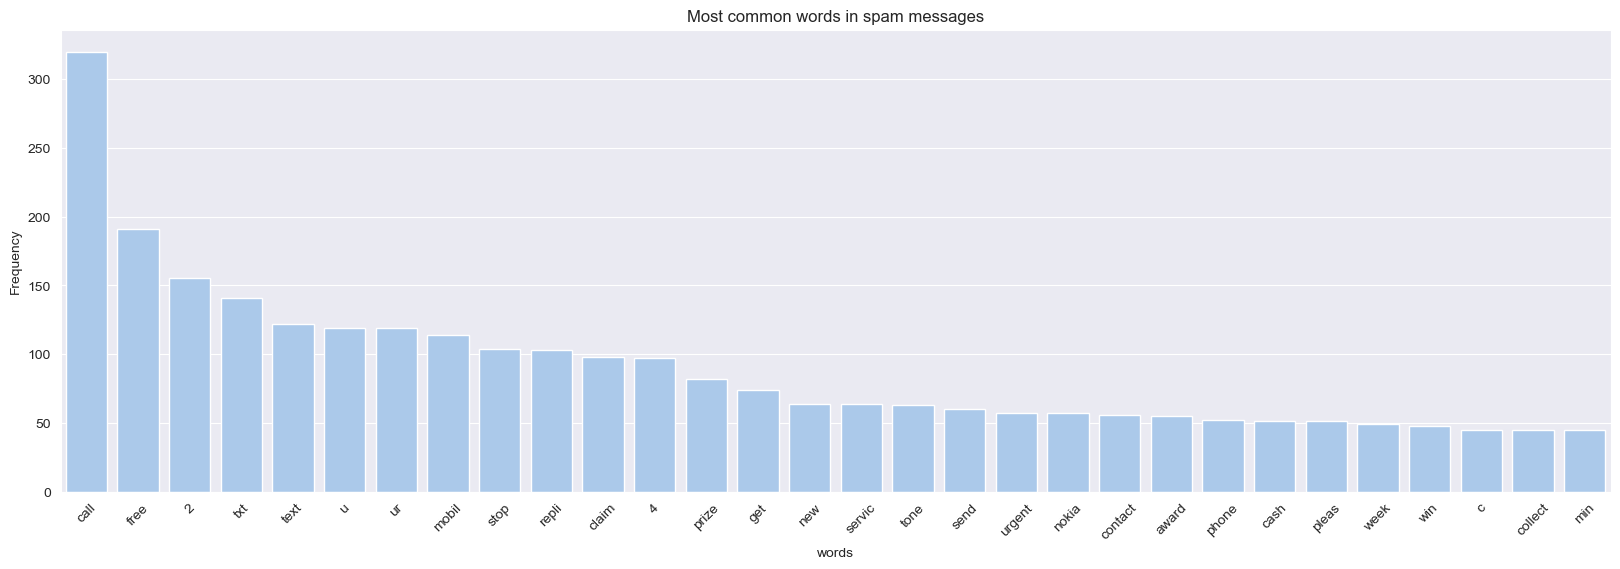

In [39]:
from collections import Counter
counter = Counter(spam_corpus)
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.barplot(x = [item[0] for item in counter.most_common(30)],
           y = [item[1] for item in counter.most_common(30)])
plt.xlabel('words')
plt.ylabel('Frequency')
plt.title('Most common words in spam messages')
plt.xticks(rotation = 45)
plt.show

In [40]:
ham_corpus = []
for message in data[data['target'] == 0]['transformed_text']:
    for word in message.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

35404

<function matplotlib.pyplot.show(close=None, block=None)>

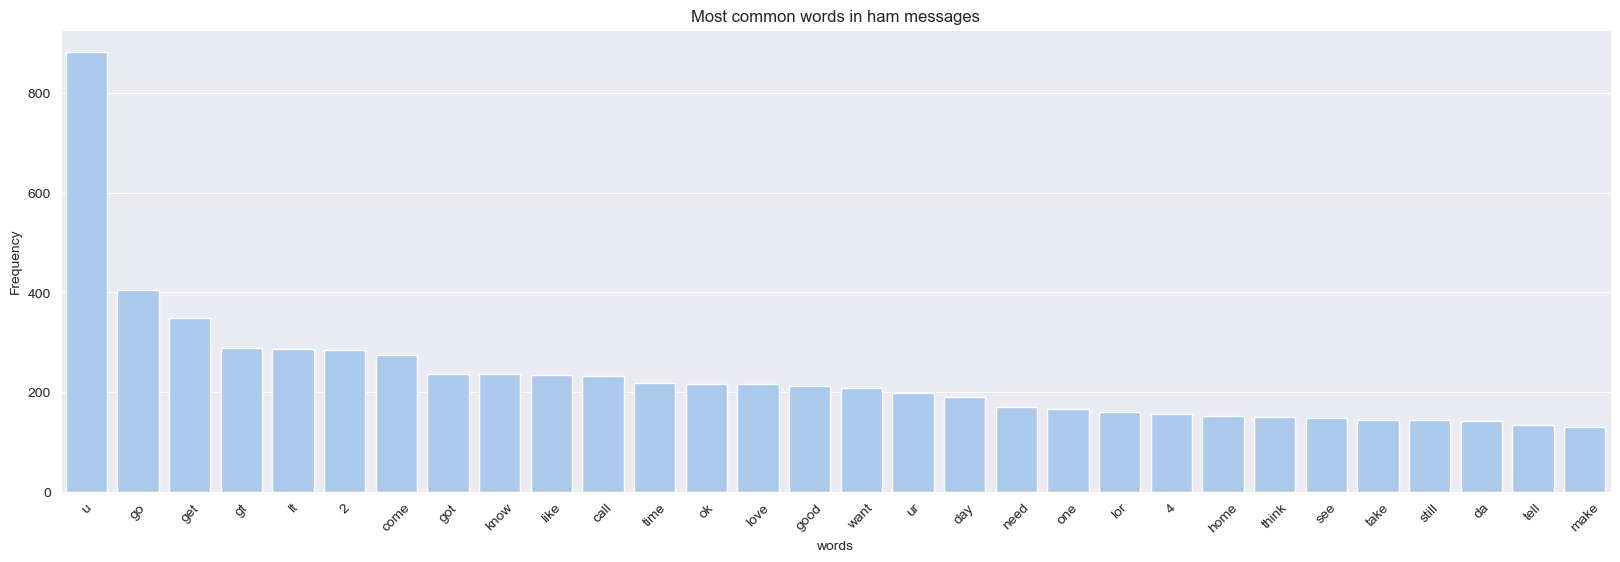

In [42]:
from collections import Counter
counter = Counter(ham_corpus)
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.barplot(x = [item[0] for item in counter.most_common(30)],
           y = [item[1] for item in counter.most_common(30)])
plt.xlabel('words')
plt.ylabel('Frequency')
plt.title('Most common words in ham messages')
plt.xticks(rotation = 45)
plt.show

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [44]:
cv = CountVectorizer()
x = cv.fit_transform(data['transformed_text'] , data['num_chars']).toarray()
y = data['target'].values

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.25 , random_state = 2)

In [46]:
from sklearn.metrics import accuracy_score , precision_score ,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
LR.score(x_test,y_test)

0.9783449342614076

Text(47.722222222222214, 0.5, 'ham')

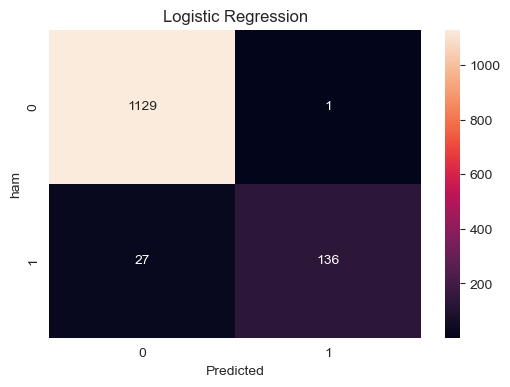

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,pred_LR),annot=True,fmt='d')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('ham')

In [48]:
print("Evaluating the Logistic Regression Model")
print("--" * 10)
accuracy = accuracy_score(y_test,pred_LR)
print("Accuracy of Logistic Regression Model : {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, pred_LR))

Evaluating the Logistic Regression Model
--------------------
Accuracy of Logistic Regression Model : 97.83%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1130
           1       0.99      0.83      0.91       163

    accuracy                           0.98      1293
   macro avg       0.98      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293



In [58]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train,y_train)
pred_NB = NB.predict(x_test)
NB.score(x_test,y_test)

0.9659706109822119

In [68]:
print("Evaluating the Navie Bayes Model")
print("--" * 10)
accuracy = accuracy_score(y_test,pred_NB)
print("Accuracy of Navie Bayes Model : {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, pred_NB))

Evaluating the Navie Bayes Model
--------------------
Accuracy of Navie Bayes Model : 96.60%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1130
           1       0.84      0.90      0.87       163

    accuracy                           0.97      1293
   macro avg       0.91      0.94      0.93      1293
weighted avg       0.97      0.97      0.97      1293



Text(47.722222222222214, 0.5, 'ham')

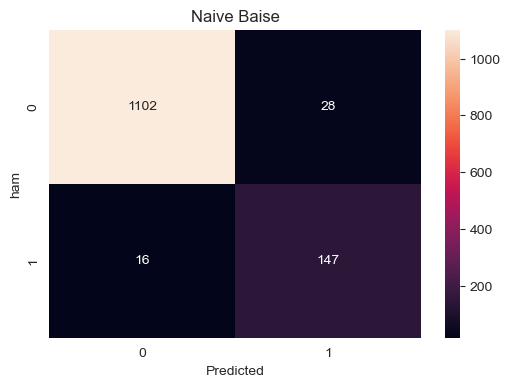

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,pred_NB),annot=True,fmt='d')
plt.title('Naive Baise')
plt.xlabel('Predicted')
plt.ylabel('ham')

In [64]:
def output_label(n):
    if n == 0:
        return "HAM"
    elif n == 1:
        return "SPAM"

def manual_testing(sms):
    testing_sms = {"text":[sms]}
    new_def_test = pd.DataFrame(testing_sms)
    new_def_test["text"] = new_def_test["text"].apply(transform_text)
    new_x_test = new_def_test["text"]
    new_xv_test = cv.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    pred_nb = NB.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nNB Prediction: {}".format(output_label(pred_lr[0]),
                                                                   output_label(pred_nb[0])))

In [72]:
import string
sms = str(input())
manual_testing(sms)

 Your Uber code is 9213. Never share this code. qlRnn4A1sbt




LR Prediction: HAM 
NB Prediction: SPAM


ModuleNotFoundError: No module named 'joblib'